In [ ]:
def monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations = 100000, option_type = "call"):
    """ Function docstring """
    """
    Monte Carlo simulation for European option pricing.

    Parameters:
    S0 : float  - Current stock price
    K : float   - Strike price
    T : float   - Time to maturity (in years)
    r : float   - Risk - free interest rate
    sigma : float - Volatility of the stock
    num_simulations : int - Number of Monte Carlo simulations
    option_type : str - "call" or "put"

    Returns:
    float - Simulated option price
    """
    np.random.seed(42)  # For reproducibility

    # Simulate stock prices at maturity using Geometric Brownian Motion (GBM)
    Z = np.random.standard_normal(num_simulations)  # Generate standard normal samples
    ST = S0 * np.exp((r - 0.5 * sigma * *2) * T + sigma * np.sqrt(T) * Z)  # GBM formula

    # Compute payoff for call or put
    if option_type == "call":
        payoffs = np.maximum(ST - K, 0)  # Call option payoff
    elif option_type == "put":
        payoffs = np.maximum(K - ST, 0)  # Put option payoff
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    # Discounted expected payoff
    option_price = np.exp( - r * T) * np.mean(payoffs)

    return option_price

# Parameters (Same as Heston Model)
S0 = 100   # Stock price
K = 105    # Strike price
T = 1      # Time to maturity
r = 0.02   # Risk - free rate
sigma = np.sqrt(0.20 * *2)

call_price_mc = monte_carlo_option_pricing(S0, K, T, r, sigma, option_type = "call")
put_price_mc = monte_carlo_option_pricing(S0, K, T, r, sigma, option_type = "put")

print(f"Monte Carlo Call Option Price: {call_price_mc:.2f}")
print(f"Monte Carlo Put Option Price: {put_price_mc:.2f}")


Monte Carlo Call Option Price: 6.72
Monte Carlo Put Option Price: 9.62



Strike Price: 90
Monte Carlo Call Option Price: 14.83
Black-Scholes Call Option Price: 14.81

Strike Price: 100
Monte Carlo Call Option Price: 8.94
Black-Scholes Call Option Price: 8.92

Strike Price: 110
Monte Carlo Call Option Price: 4.96
Black-Scholes Call Option Price: 4.94


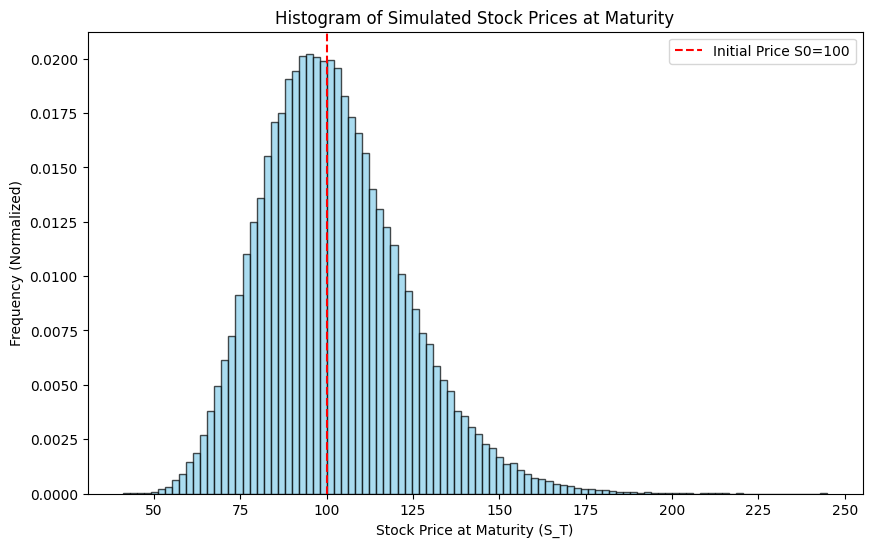

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes(S0, K, T, r, sigma, option_type = "call"):
    """ Function docstring """
    """Computes the Black - Scholes price for a European call or put option."""
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma * *2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        price = S0 * norm.cdf(d1) - K * np.exp( - r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = K * np.exp( - r * T) * norm.cdf( - d2) - S0 * norm.cdf( - d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return price

def monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations = 100000, option_type = "call"):
    """ Function docstring """
    """
    Monte Carlo simulation for European option pricing with stock price histogram.

    Returns:
    - Option price
    - Simulated stock prices at maturity
    """
    np.random.seed(42)  # For reproducibility

    # Simulate stock prices at maturity using Geometric Brownian Motion (GBM)
    Z = np.random.standard_normal(num_simulations)  # Generate standard normal samples
    ST = S0 * np.exp((r - 0.5 * sigma * *2) * T + sigma * np.sqrt(T) * Z)  # GBM formula

    # Compute payoff for call or put
    if option_type == "call":
        payoffs = np.maximum(ST - K, 0)  # Call option payoff
    elif option_type == "put":
        payoffs = np.maximum(K - ST, 0)  # Put option payoff
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    # Discounted expected payoff
    option_price = np.exp( - r * T) * np.mean(payoffs)

    return option_price, ST

# Parameters (Same as Heston Model)
S0 = 100   # Stock price
T = 1      # Time to maturity
r = 0.02   # Risk - free rate
sigma = np.sqrt(0.20 * *2)
num_simulations = 100000  # Number of Monte Carlo simulations

# Define different strike prices for comparison
strike_prices = [90, 100, 110]

# Store results
results = []

# Compute MC and BS prices for different strikes
for K in strike_prices:
    call_price_mc, ST = monte_carlo_option_pricing(S0, K, T, r, sigma, num_simulations, option_type = "call")
    call_price_bs = black_scholes(S0, K, T, r, sigma, option_type = "call")
    results.append((K, call_price_mc, call_price_bs))

    print(f"\nStrike Price: {K}")
    print(f"Monte Carlo Call Option Price: {call_price_mc:.2f}")
    print(f"Black - Scholes Call Option Price: {call_price_bs:.2f}")

# Plot Histogram of Simulated Stock Prices
plt.figure(figsize = (10, 6))
plt.hist(ST, bins = 100, color = 'skyblue', edgecolor = 'black', alpha = 0.7, density = True)
plt.axvline(S0, color = 'red', linestyle = 'dashed', label = f"Initial Price S0 = {S0}")
plt.xlabel("Stock Price at Maturity (S_T)")
plt.ylabel("Frequency (Normalized)")
plt.title("Histogram of Simulated Stock Prices at Maturity")
plt.legend()
plt.show()


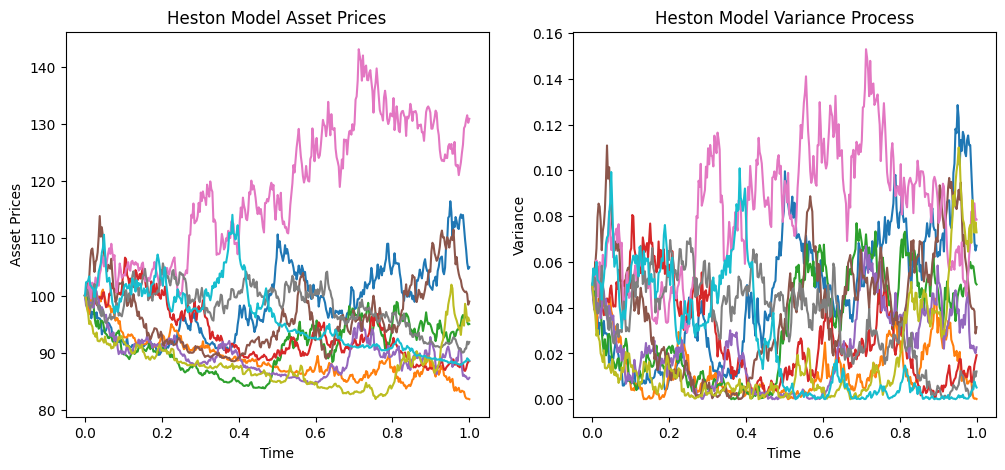

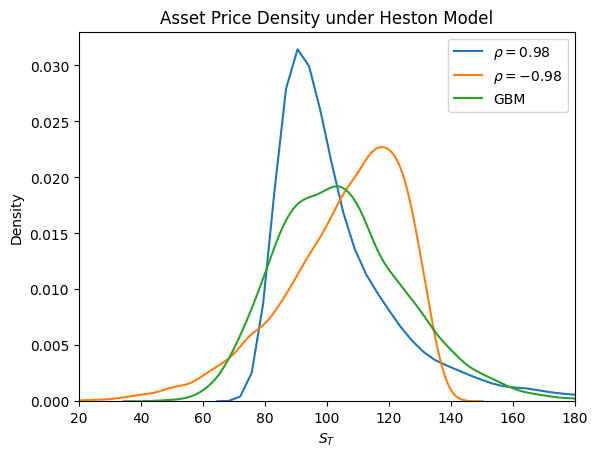

/usr/local/lib/python3.11/dist-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
  below_intrinsic, above_max_price = _check_below_and_above_intrinsic(K, F, flag, undiscounted_option_price, on_error)


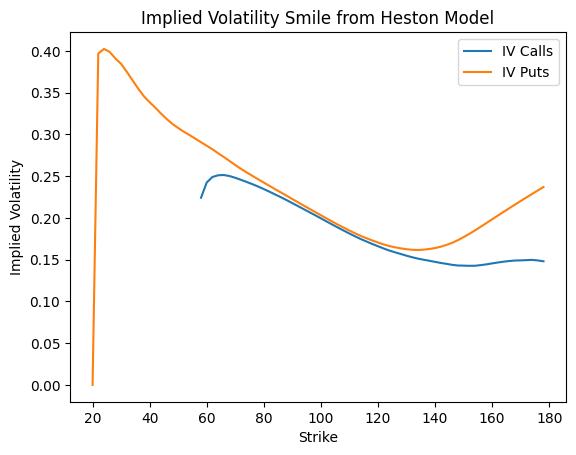

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from py_vollib_vectorized import vectorized_implied_volatility as implied_vol

# = = = UPDATED PARAMETERS = = = # 
S0 = 100.0             # Initial stock price
T = 1.0                # Time to maturity (in years)
r = 0.05               # Risk - free rate (updated)
N = 365                # Number of time steps (increased for accuracy)
M = 10000              # Number of Monte Carlo simulations (increased for better estimates)

# Heston Model Parameters
kappa = 2.5            # Mean reversion speed (updated)
theta = 0.04           # Long - term variance (20% volatility squared)
v0 = 0.05              # Initial variance (25% volatility squared)
rho = -0.7             # Correlation between asset returns and variance (updated)
sigma = 0.5            # Volatility of variance (updated)

def heston_model_sim(S0, v0, rho, kappa, theta, sigma, T, N, M):
    """ Function docstring """
    """
    Simulates asset prices and variance using the Heston model.
    """
    dt = T / N  # Time step
    mu = np.array([0, 0])  # Mean for Brownian motion
    cov = np.array([[1, rho], [rho, 1]])  # Correlation matrix

    # Initialize stock price and variance paths
    S = np.full((N + 1, M), S0)
    v = np.full((N + 1, M), v0)

    # Generate correlated Brownian motions
    Z = np.random.multivariate_normal(mu, cov, (N, M))

    for i in range(1, N + 1):
        v_t = np.maximum(v[i - 1], 1e - 6)  # Ensure variance is positive
        dv = kappa * (theta - v_t) * dt + sigma * np.sqrt(v_t * dt) * Z[i - 1, :, 1]
        v[i] = np.maximum(v_t + dv, 1e - 6)  # Apply lower bound

        # Log - Euler scheme for stock price
        dS = (r - 0.5 * v_t) * dt + np.sqrt(v_t * dt) * Z[i - 1, :, 0]
        S[i] = S[i - 1] * np.exp(dS)

    return S, v

# = = = SIMULATE PRICES FOR DIFFERENT CORRELATIONS = = = # 
rho_p = 0.98
rho_n = -0.98
S_p, v_p = heston_model_sim(S0, v0, rho_p, kappa, theta, sigma, T, N, M)
S_n, v_n = heston_model_sim(S0, v0, rho_n, kappa, theta, sigma, T, N, M)

# = = = PLOT PRICE AND VARIANCE PATHS = = = # 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
time = np.linspace(0, T, N + 1)

ax1.plot(time, S_p[:, :10])  # Plot only 10 sample paths for clarity
ax1.set_title("Heston Model Asset Prices")
ax1.set_xlabel("Time")
ax1.set_ylabel("Asset Prices")

ax2.plot(time, v_p[:, :10])  # Plot only 10 sample paths for clarity
ax2.set_title("Heston Model Variance Process")
ax2.set_xlabel("Time")
ax2.set_ylabel("Variance")

plt.show()

# = = = COMPARE DISTRIBUTION WITH GBM = = = # 
gbm = S0 * np.exp((r - theta / 2) * T + np.sqrt(theta) * np.sqrt(T) * np.random.normal(0, 1, M))

fig, ax = plt.subplots()
sns.kdeplot(S_p[ - 1], label = r"$\rho= 0.98$", ax = ax)
sns.kdeplot(S_n[ - 1], label = r"$\rho= -0.98$", ax = ax)
sns.kdeplot(gbm, label = "GBM", ax = ax)

plt.title(r"Asset Price Density under Heston Model")
plt.xlim([20, 180])
plt.xlabel("$S_T$")
plt.ylabel("Density")
plt.legend()
plt.show()

# = = = COMPUTE OPTION PRICES & IMPLIED VOLATILITY SMILE = = = # 
rho = -0.7
S, v = heston_model_sim(S0, v0, rho, kappa, theta, sigma, T, N, M)

K = np.arange(20, 180, 2)  # Strike prices
puts = np.array([np.exp( - r * T) * np.mean(np.maximum(k - S[ - 1], 0)) for k in K])
calls = np.array([np.exp( - r * T) * np.mean(np.maximum(S[ - 1] - k, 0)) for k in K])

# Compute Implied Volatility
put_ivs = implied_vol(puts, S0, K, T, r, flag = 'p', q = 0, return_as = 'numpy', on_error = 'ignore')
call_ivs = implied_vol(calls, S0, K, T, r, flag = 'c', q = 0, return_as = 'numpy')

# = = = PLOT IMPLIED VOLATILITY SMILE = = = # 
plt.plot(K, call_ivs, label = r"IV Calls")
plt.plot(K, put_ivs, label = r"IV Puts")
plt.ylabel("Implied Volatility")
plt.xlabel("Strike")
plt.title("Implied Volatility Smile from Heston Model")
plt.legend()
plt.show()


Heston Model Call Option Price: 6.4223


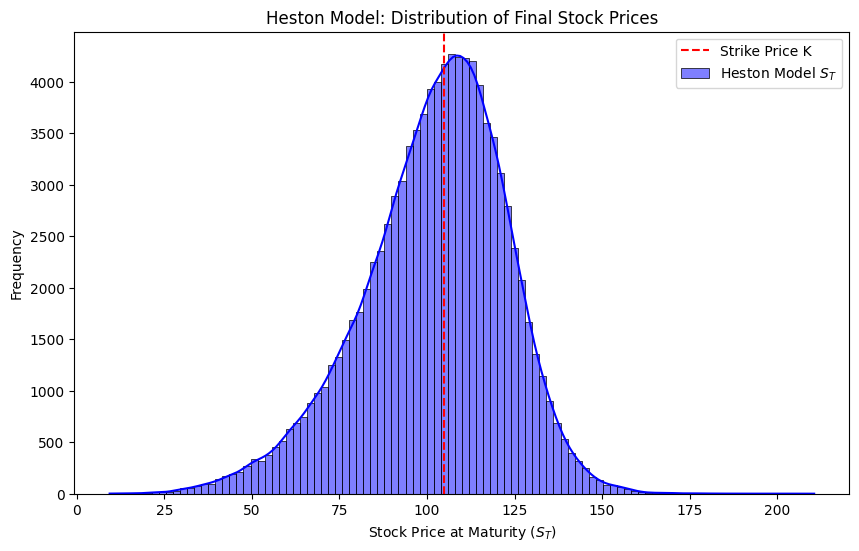

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from py_vollib_vectorized import vectorized_implied_volatility as implied_vol

# = = = PARAMETERS = = = # 
S0 = 100.0             # Initial stock price
T = 1.0                # Time to maturity (in years)
r = 0.02               # Risk - free rate
N = 252                # Number of time steps
M = 100000             # Number of Monte Carlo simulations

# Heston Model Parameters
kappa = 3              # Mean reversion speed
theta = 0.20 * *2        # Long - term variance
v0 = 0.25 * *2           # Initial variance
rho = -0.7             # Correlation between stock and variance
sigma = 0.6            # Volatility of variance

def heston_model_sim(S0, v0, rho, kappa, theta, sigma, T, N, M):
    """ Function docstring """
    """
    Simulates asset prices using the Heston model.
    """
    dt = T / N  # Time step
    mu = np.array([0, 0])  # Mean for Brownian motion
    cov = np.array([[1, rho], [rho, 1]])  # Correlation matrix

    # Initialize stock price and variance paths
    S = np.full((N + 1, M), S0)
    v = np.full((N + 1, M), v0)

    # Generate correlated Brownian motions
    Z = np.random.multivariate_normal(mu, cov, (N, M))

    for i in range(1, N + 1):
        v_t = np.maximum(v[i - 1], 1e - 6)  # Ensure variance is positive
        dv = kappa * (theta - v_t) * dt + sigma * np.sqrt(v_t * dt) * Z[i - 1, :, 1]
        v[i] = np.maximum(v_t + dv, 1e - 6)  # Apply lower bound

        # Log - Euler scheme for stock price
        dS = (r - 0.5 * v_t) * dt + np.sqrt(v_t * dt) * Z[i - 1, :, 0]
        S[i] = S[i - 1] * np.exp(dS)

    return S

# = = = COMPUTE OPTION PRICE = = = # 
K = 105  # Strike price
S = heston_model_sim(S0, v0, rho, kappa, theta, sigma, T, N, M)

ST = S[ - 1]  # Extract final stock prices at maturity
call_payoffs = np.maximum(ST - K, 0)  # Call option payoff
heston_call_price = np.exp( - r * T) * np.mean(call_payoffs)  # Discounted price

print(f"Heston Model Call Option Price: {heston_call_price:.4f}")

# = = = PLOT HISTOGRAM OF FINAL STOCK PRICES = = = # 
plt.figure(figsize = (10, 6))
sns.histplot(ST, bins = 100, kde = True, color = "blue", label = "Heston Model $S_T$")
plt.axvline(K, color = 'red', linestyle = 'dashed', label = "Strike Price K")
plt.xlabel("Stock Price at Maturity ($S_T$)")
plt.ylabel("Frequency")
plt.title("Heston Model: Distribution of Final Stock Prices")
plt.legend()
plt.show()


In [ ]:
import numpy as np

def heston_model_sim(S0, v0, rho, kappa, theta, sigma, T, N, M):
    """ Function docstring """
    """
    Simulates asset prices using the Heston model.
    """
    dt = T / N
    mu = np.array([0, 0])
    cov = np.array([[1, rho], [rho, 1]])

    S = np.full((N + 1, M), S0)
    v = np.full((N + 1, M), v0)

    Z = np.random.multivariate_normal(mu, cov, (N, M))

    for i in range(1, N + 1):
        v_t = np.maximum(v[i - 1], 1e - 6)
        dv = kappa * (theta - v_t) * dt + sigma * np.sqrt(v_t * dt) * Z[i - 1, :, 1]
        v[i] = np.maximum(v_t + dv, 1e - 6)

        dS = (r - 0.5 * v_t) * dt + np.sqrt(v_t * dt) * Z[i - 1, :, 0]
        S[i] = S[i - 1] * np.exp(dS)

    return S[ - 1]  # Return final stock prices at T

def heston_call_price(S0, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations = 50000):
    """ Function docstring """
    """
    Computes the European call option price using Monte Carlo Heston simulation.
    """
    S_T = heston_model_sim(S0, v0, rho, kappa, theta, sigma_v, T, 252, num_simulations)
    payoff = np.maximum(S_T - K, 0)  # Call option payoff
    return np.exp( - r * T) * np.mean(payoff)

def compute_greeks_fixed(S0, K, T, r, v0, kappa, theta, sigma_v, rho, eps = 0.5):
    """ Function docstring """
    """
    Compute Greeks using finite difference method with better numerical stability.
    """
    num_simulations = 50000

    # Baseline call price
    C0 = heston_call_price(S0, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations)

    # Delta
    C_plus = heston_call_price(S0 + eps, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations)
    C_minus = heston_call_price(S0 - eps, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations)
    delta = (C_plus - C_minus) / (2 * eps)

    # Gamma
    eps_gamma = 1.0
    C_plus_g = heston_call_price(S0 + eps_gamma, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations)
    C_minus_g = heston_call_price(S0 - eps_gamma, K, T, r, v0, kappa, theta, sigma_v, rho, num_simulations)
    gamma = (C_plus_g - 2 * C0 + C_minus_g) / (eps_gamma ** 2)

    # Vega
    C_vega = heston_call_price(S0, K, T, r, v0 + eps, kappa, theta, sigma_v, rho, num_simulations)
    vega = (C_vega - C0) / eps

    # Theta
    C_theta = heston_call_price(S0, K, T - eps, r, v0, kappa, theta, sigma_v, rho, num_simulations)
    theta = (C_theta - C0) / eps

    # Rho
    C_rho = heston_call_price(S0, K, T, r + eps, v0, kappa, theta, sigma_v, rho, num_simulations)
    rho_greek = (C_rho - C0) / eps

    return {"Delta": delta, "Gamma": gamma, "Vega": vega, "Theta": theta, "Rho": rho_greek}

# = = = PARAMETERS = = = # 
S0 = 100.0             # Initial stock price
T = 1.0                # Time to maturity (in years)
r = 0.02               # Risk - free rate
N = 252                # Number of time steps
M = 100000             # Number of Monte Carlo simulations

# Heston Model Parameters
kappa = 3              # Mean reversion speed
theta = 0.20 * *2        # Long - term variance
v0 = 0.25 * *2           # Initial variance
rho = -0.7             # Correlation between stock and variance
sigma_v = 0.6            # Volatility of variance

fixed_greeks = compute_greeks_fixed(S0, K, T, r, v0, kappa, theta, sigma_v, rho)

# Print results
for greek, value in fixed_greeks.items():
    print(f"{greek}: {value:.4f}")


Delta: 0.5395
Gamma: 0.0454
Vega: 18.0112
Theta: -5.2850
Rho: -15.5494


<ipython-input-58-e78266cf74b8>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls.dropna(inplace=True)


Heston Model Pricing Errors - MAE: 0.7253, RMSE: 1.2101
Black-Scholes Pricing Errors - MAE: 1.0062, RMSE: 1.4231


/usr/local/lib/python3.11/dist-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
  below_intrinsic, above_max_price = _check_below_and_above_intrinsic(K, F, flag, undiscounted_option_price, on_error)
/usr/local/lib/python3.11/dist-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [2, 3, 4, 5, 6, 7, 8, 9, 14, 18, 25]
  below_intrinsic, above_max_price = _check_below_and_above_intrinsic(K, F, flag, undiscounted_option_price, on_error)


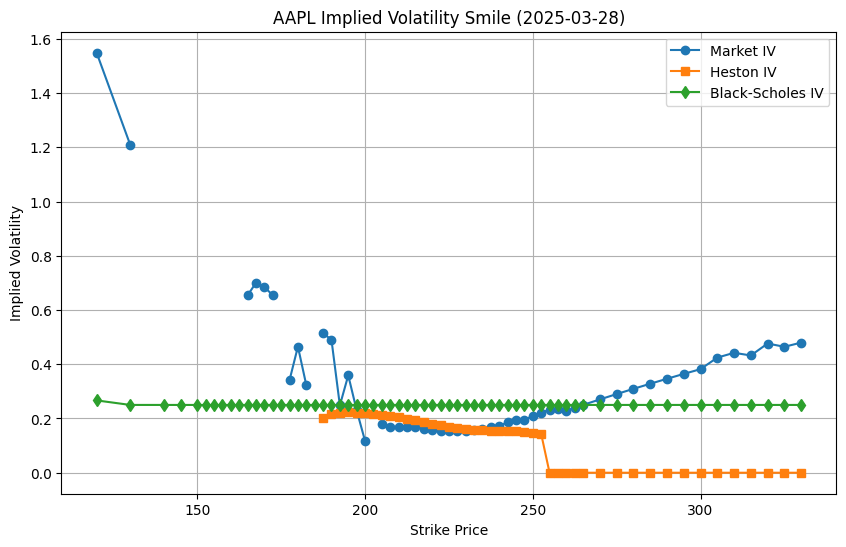

In [58]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.optimize import minimize
from py_vollib_vectorized import vectorized_implied_volatility as implied_vol

# = = = PARAMETERS = = = # 
S0 = 100.0            # Initial stock price (will be updated dynamically)
T = 30 / 365          # Time to expiration (1 month)
r = 0.02              # Risk - free rate
N = 252               # Number of time steps
M = 10000             # Number of Monte Carlo simulations

# Heston Model Parameters
kappa = 3.0           # Mean reversion speed
theta = 0.04          # Long - term variance
v0 = 0.04             # Initial variance
rho = -0.7            # Correlation between asset and variance
sigma_v = 0.6         # Volatility of variance

# FUNCTION: Heston Model Simulation
def heston_model_sim(S0, v0, rho, kappa, theta, sigma_v, T, N, M):
    """ Function docstring """
    dt = T / N
    mu = np.array([0, 0])
    cov = np.array([[1, rho], [rho, 1]])

    S = np.full((N + 1, M), S0)
    v = np.full((N + 1, M), v0)

    Z = np.random.multivariate_normal(mu, cov, (N, M))

    for i in range(1, N + 1):
        v_t = np.maximum(v[i - 1], 1e - 6)
        dv = kappa * (theta - v_t) * dt + sigma_v * np.sqrt(v_t * dt) * Z[i - 1, :, 1]
        v[i] = np.maximum(v_t + dv, 1e - 6)

        dS = (r - 0.5 * v_t) * dt + np.sqrt(v_t * dt) * Z[i - 1, :, 0]
        S[i] = S[i - 1] * np.exp(dS)

    return S, v

# FUNCTION: Black - Scholes Formula
def black_scholes(S, K, T, r, sigma, option_type = "call"):
    """ Function docstring """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        price = S * norm.cdf(d1) - K * np.exp( - r * T) * norm.cdf(d2)
    else:
        price = K * np.exp( - r * T) * norm.cdf( - d2) - S * norm.cdf( - d1)

    return price

# FETCH MARKET DATA # 
def fetch_market_data(ticker = "AAPL", expiry = "2024 - 04 - 19"):
    """ Function docstring """
    stock = yf.Ticker(ticker)
    stock_price = stock.history(period = "1d")["Close"].iloc[ - 1]

    options = stock.option_chain(expiry)
    calls = options.calls
    calls = calls[['strike', 'lastPrice']]
    calls.columns = ['Strike', 'Market_Price']
    calls.dropna(inplace = True)

    return stock_price, calls

# Compare Model vs Market Prices # 
def backtest_heston(ticker = "AAPL", expiry = "2025 - 03 - 28"):
    """ Function docstring """
    S0, call_data = fetch_market_data(ticker, expiry)
    strikes = call_data["Strike"].values
    market_prices = call_data["Market_Price"].values

    # Simulate Heston Model
    S, _ = heston_model_sim(S0, v0, rho, kappa, theta, sigma_v, T, N, M)
    model_prices_heston = np.array([np.exp( - r * T) * np.mean(np.maximum(S[ - 1] - K, 0)) for K in strikes])

    # Compute Black - Scholes Prices
    sigma_market = 0.25  # Approximate market IV
    model_prices_bs = np.array([black_scholes(S0, K, T, r, sigma_market) for K in strikes])

    # Compute Pricing Errors
    mae_heston = np.mean(np.abs(model_prices_heston - market_prices))
    rmse_heston = np.sqrt(np.mean((model_prices_heston - market_prices) ** 2))

    mae_bs = np.mean(np.abs(model_prices_bs - market_prices))
    rmse_bs = np.sqrt(np.mean((model_prices_bs - market_prices) ** 2))

    print(f"Heston Model Pricing Errors - MAE: {mae_heston:.4f}, RMSE: {rmse_heston:.4f}")
    print(f"Black - Scholes Pricing Errors - MAE: {mae_bs:.4f}, RMSE: {rmse_bs:.4f}")

    # Compute Implied Volatility
    heston_ivs = implied_vol(model_prices_heston, S0, strikes, T, r, flag = 'c', q = 0, return_as = 'numpy')
    bs_ivs = implied_vol(model_prices_bs, S0, strikes, T, r, flag = 'c', q = 0, return_as = 'numpy')
    market_ivs = implied_vol(market_prices, S0, strikes, T, r, flag = 'c', q = 0, return_as = 'numpy')

    # Plot Implied Volatility Smile
    plt.figure(figsize = (10, 6))
    plt.plot(strikes, market_ivs, 'o - ', label = "Market IV")
    plt.plot(strikes, heston_ivs, 's - ', label = "Heston IV")
    plt.plot(strikes, bs_ivs, 'd - ', label = "Black - Scholes IV")
    plt.xlabel("Strike Price")
    plt.ylabel("Implied Volatility")
    plt.title(f"AAPL Implied Volatility Smile ({expiry})")
    plt.legend()
    plt.grid(True)
    plt.show()

backtest_heston()


<ipython-input-60-ea4496990625>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls.dropna(inplace=True)


Heston Model Pricing Errors - MAE: 0.7350, RMSE: 1.2135
Black-Scholes Pricing Errors - MAE: 1.0062, RMSE: 1.4231


/usr/local/lib/python3.11/dist-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [2, 3, 4, 5, 6, 7, 8, 9, 14, 18, 25]
  below_intrinsic, above_max_price = _check_below_and_above_intrinsic(K, F, flag, undiscounted_option_price, on_error)


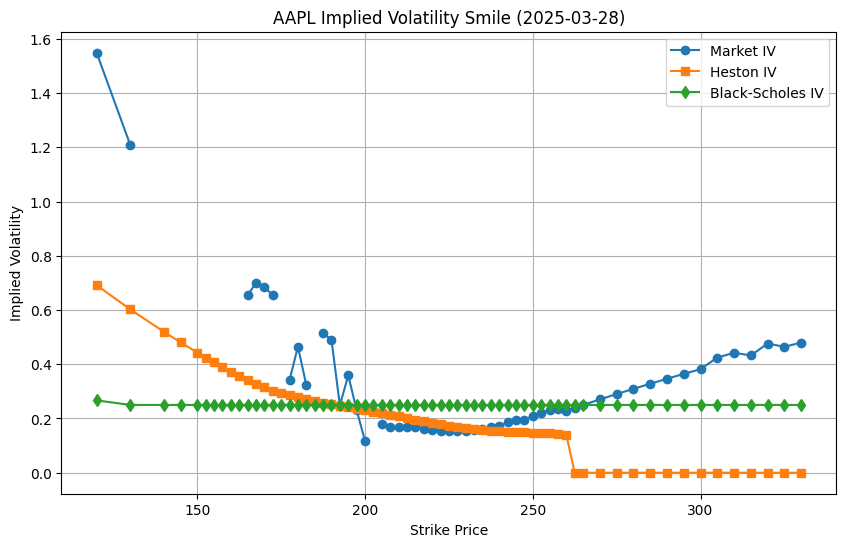

In [60]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.optimize import minimize
from py_vollib_vectorized import vectorized_implied_volatility as implied_vol

# = = = PARAMETERS = = = # 
S0 = 100.0            # Initial stock price (will be updated dynamically)
T = 30 / 365          # Time to expiration (1 month)
r = 0.02              # Risk - free rate
N = 252               # Number of time steps
M = 500000             # Number of Monte Carlo simulations

# Heston Model Parameters
kappa = 3.0           # Mean reversion speed
theta = 0.04          # Long - term variance
v0 = 0.04             # Initial variance
rho = -0.7            # Correlation between asset and variance
sigma_v = 0.6         # Volatility of variance

# = = = FUNCTION: Heston Model Simulation = = = # 
def heston_model_sim(S0, v0, rho, kappa, theta, sigma_v, T, N, M):
    """ Function docstring """
    dt = T / N
    mu = np.array([0, 0])
    cov = np.array([[1, rho], [rho, 1]])

    S = np.full((N + 1, M), S0)
    v = np.full((N + 1, M), v0)

    Z = np.random.multivariate_normal(mu, cov, (N, M))

    for i in range(1, N + 1):
        v_t = np.maximum(v[i - 1], 1e - 6)
        dv = kappa * (theta - v_t) * dt + sigma_v * np.sqrt(v_t * dt) * Z[i - 1, :, 1]
        v[i] = np.maximum(v_t + dv, 1e - 6)

        dS = (r - 0.5 * v_t) * dt + np.sqrt(v_t * dt) * Z[i - 1, :, 0]
        S[i] = S[i - 1] * np.exp(dS)

    return S, v

# = = = FUNCTION: Black - Scholes Formula = = = # 
def black_scholes(S, K, T, r, sigma, option_type = "call"):
    """ Function docstring """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        price = S * norm.cdf(d1) - K * np.exp( - r * T) * norm.cdf(d2)
    else:
        price = K * np.exp( - r * T) * norm.cdf( - d2) - S * norm.cdf( - d1)

    return price

# = = = FETCH MARKET DATA = = = # 
def fetch_market_data(ticker = "AAPL", expiry = "2024 - 04 - 19"):
    """ Function docstring """
    stock = yf.Ticker(ticker)
    stock_price = stock.history(period = "1d")["Close"].iloc[ - 1]

    options = stock.option_chain(expiry)
    calls = options.calls
    calls = calls[['strike', 'lastPrice']]
    calls.columns = ['Strike', 'Market_Price']
    calls.dropna(inplace = True)

    return stock_price, calls

# = = = FUNCTION: Compare Model vs Market Prices = = = # 
def backtest_heston(ticker = "AAPL", expiry = "2025 - 03 - 28"):
    """ Function docstring """
    S0, call_data = fetch_market_data(ticker, expiry)
    strikes = call_data["Strike"].values
    market_prices = call_data["Market_Price"].values

    # Simulate Heston Model
    S, _ = heston_model_sim(S0, v0, rho, kappa, theta, sigma_v, T, N, M)
    model_prices_heston = np.array([np.exp( - r * T) * np.mean(np.maximum(S[ - 1] - K, 0)) for K in strikes])

    # Compute Black - Scholes Prices
    sigma_market = 0.25  # Approximate market IV
    model_prices_bs = np.array([black_scholes(S0, K, T, r, sigma_market) for K in strikes])

    # Compute Pricing Errors
    mae_heston = np.mean(np.abs(model_prices_heston - market_prices))
    rmse_heston = np.sqrt(np.mean((model_prices_heston - market_prices) ** 2))

    mae_bs = np.mean(np.abs(model_prices_bs - market_prices))
    rmse_bs = np.sqrt(np.mean((model_prices_bs - market_prices) ** 2))

    print(f"Heston Model Pricing Errors - MAE: {mae_heston:.4f}, RMSE: {rmse_heston:.4f}")
    print(f"Black - Scholes Pricing Errors - MAE: {mae_bs:.4f}, RMSE: {rmse_bs:.4f}")

    # Compute Implied Volatility
    heston_ivs = implied_vol(model_prices_heston, S0, strikes, T, r, flag = 'c', q = 0, return_as = 'numpy')
    bs_ivs = implied_vol(model_prices_bs, S0, strikes, T, r, flag = 'c', q = 0, return_as = 'numpy')
    market_ivs = implied_vol(market_prices, S0, strikes, T, r, flag = 'c', q = 0, return_as = 'numpy')

    # Plot Implied Volatility Smile
    plt.figure(figsize = (10, 6))
    plt.plot(strikes, market_ivs, 'o - ', label = "Market IV")
    plt.plot(strikes, heston_ivs, 's - ', label = "Heston IV")
    plt.plot(strikes, bs_ivs, 'd - ', label = "Black - Scholes IV")
    plt.xlabel("Strike Price")
    plt.ylabel("Implied Volatility")
    plt.title(f"AAPL Implied Volatility Smile ({expiry})")
    plt.legend()
    plt.grid(True)
    plt.show()

# = = = RUN BACKTEST = = = # 
backtest_heston()
